<a href="https://colab.research.google.com/github/kylemcdonald/ml-examples/blob/master/workshop/unsupervised_learning/Unsupervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised Learning: Clustering


Unsupervised learning is about what we can learn without labels.

Let's load the iris data again, but ignore the labels.

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
y = iris.target
x2d = iris.data[:, 2:4]

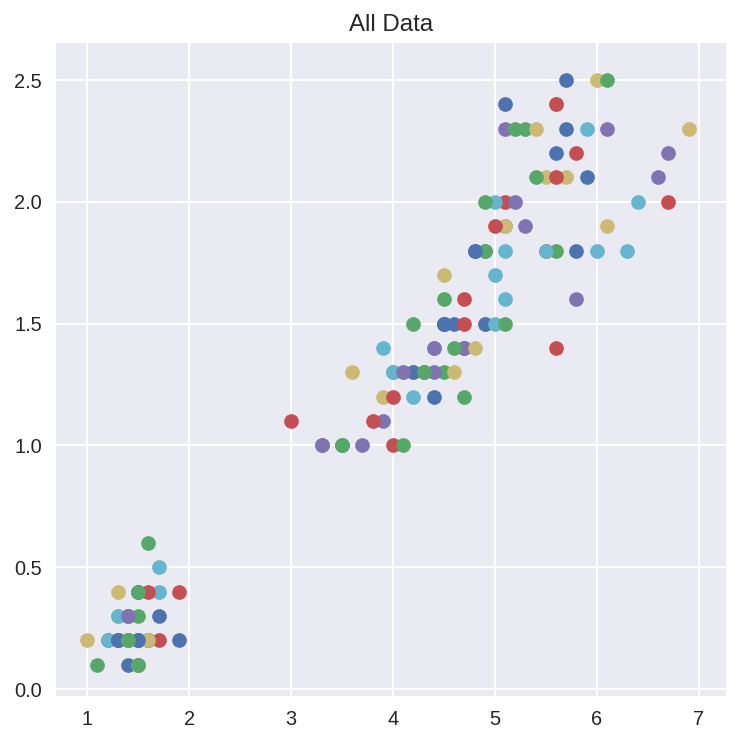

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for point in x2d:
    plt.scatter(point[0], point[1])
    plt.autoscale()
    plt.grid()
plt.title('All Data')
plt.show()

It's clear when we project it from this perspective that there are at least two clusters.

We can find the center of these clusters automatically using an algorithm called k-means. For a great visualization of what k-means is doing behind the scenes check out [K-Means clustering demo](http://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

In [0]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(x2d)

print(y)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


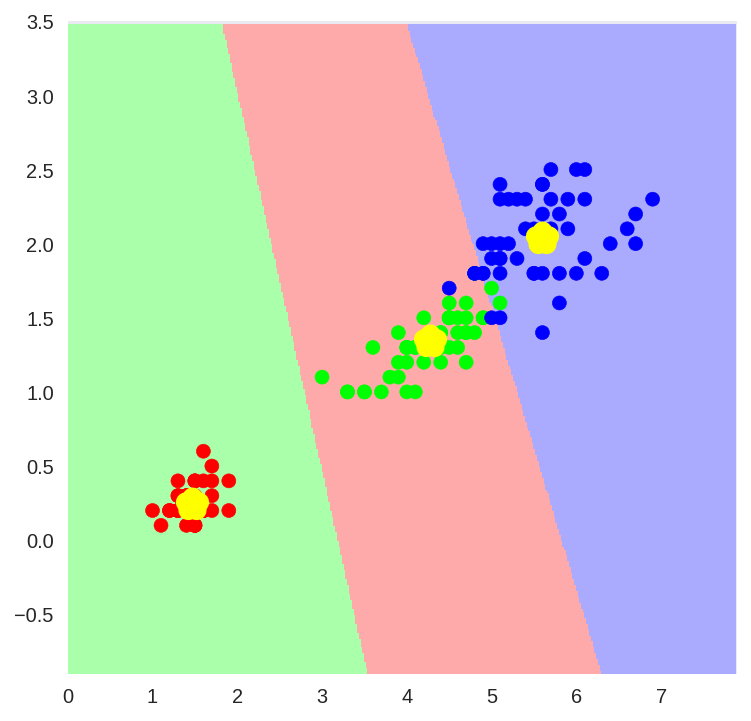

In [0]:
import numpy as np
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02

x_min, x_max = x2d[:, 0].min() - 1, x2d[:, 0].max() + 1
y_min, y_max = x2d[:, 1].min() - 1, x2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

centroids = kmeans.cluster_centers_

plt.figure(figsize=(6,6))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.pcolormesh(xx, yy, z, cmap=cmap_light)
plt.scatter(x2d[:,0], x2d[:,1], c=y, cmap=cmap_bold)
plt.scatter(centroids[:,0],centroids[:,1], color='yellow', marker='*',linewidths=10)

### Application: dominant color extraction from an image.

In [0]:
!wget --quiet -O scream.jpg "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg/512px-Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg"

In [0]:
# also try using a file uploader:
# from google.colab import files
# uploaded = files.upload()

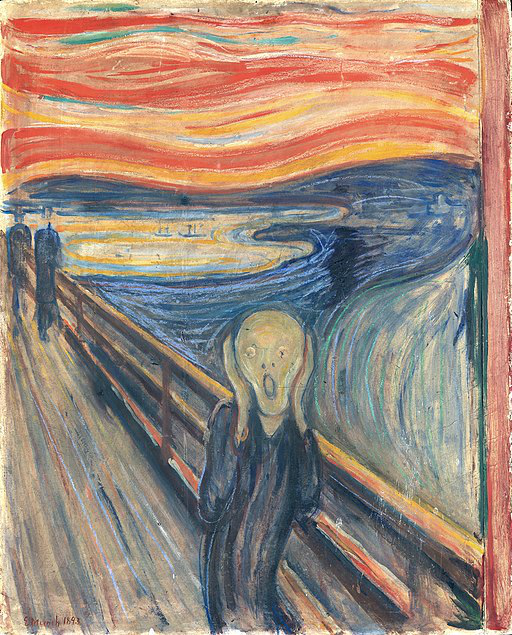

In [0]:
from PIL import Image
image = Image.open('scream.jpg').convert('RGB')
image

In [0]:
image_array = np.array(image).astype(np.float32) / 255.
print(image_array.shape)

(635, 512, 3)


The image was loaded in (635, 512, 3) size. Note that the first dimension (635) is bigger than the second dimension (512). This is because the data is in the order: (rows, columns, channels).

Scikit-learn algorithms take data where each item is in the format (number of observations, number of features), so let's convert it to that format.

In [0]:
rgb = np.reshape(image_array, (-1, 3))
print(rgb.shape)

(325120, 3)


In [0]:
kmeans_color = cluster.KMeans(init='k-means++', n_clusters=10)
%time kmeans_color.fit(rgb)

CPU times: user 22.3 s, sys: 1.98 s, total: 24.3 s
Wall time: 21.6 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
dominant_colors = kmeans_color.cluster_centers_
print(dominant_colors.shape)

(10, 3)


Ok, we got ten points which represent dominant colors. Let's visualize them.

(1, 10, 3)


(-0.5, 9.5, 0.5, -0.5)

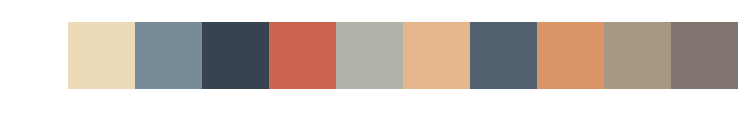

In [0]:
dominant_colors_img = np.reshape(dominant_colors, (1, -1, 3))
print(dominant_colors_img.shape)
plt.imshow(dominant_colors_img, interpolation='nearest')
plt.axis('off')

There are many clustering algorithms, the others can be found [here](http://scikit-learn.org/stable/modules/clustering.html)

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)